## python work sheet 7b
- name -> chirag taneja
- group -> 2W13(RAI)
- roll_no -> 102323072

# project 1 - tic tac toe game

In [1]:
def print_board(board):
    print(f"{board[0]}|{board[1]}|{board[2]}")
    print("-+-+-")
    print(f"{board[3]}|{board[4]}|{board[5]}")
    print("-+-+-")
    print(f"{board[6]}|{board[7]}|{board[8]}")

def get_player_input(player, board):
    while True:
        try:
            position = int(input(f"Player {player}, enter a position (1-9): ")) - 1
            if position < 0 or position > 8:
                print("Invalid position. Please choose a number between 1 and 9.")
            elif board[position] != " ":
                print("That position is already taken. Please choose another one.")
            else:
                board[position] = player
                break
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 9.")

def check_winner(board, player):
    win_combinations = [
        [0, 1, 2], [3, 4, 5], [6, 7, 8],    # Rows
        [0, 3, 6], [1, 4, 7], [2, 5, 8],    # Columns
        [0, 4, 8], [2, 4, 6]                # Diagonals
    ]
    for combo in win_combinations:
        if all(board[i] == player for i in combo):
            return True
    return False

def check_tie(board):
    return all(space != " " for space in board)

def play_game():
    while True:
        board = [" "] * 9
        current_player = "X"
        game_running = True

        while game_running:
            print_board(board)
            get_player_input(current_player, board)

            if check_winner(board, current_player):
                print_board(board)
                print(f"Congratulations! Player {current_player} wins!")
                game_running = False
            elif check_tie(board):
                print_board(board)
                print("The game is a tie!")
                game_running = False
            else:
                current_player = "O" if current_player == "X" else "X"

        play_again = input("Do you want to play again? (y/n): ").lower()
        if play_again != 'y':
            break

play_game()

 | | 
-+-+-
 | | 
-+-+-
 | | 
X| | 
-+-+-
 | | 
-+-+-
 | | 
X|O| 
-+-+-
 | | 
-+-+-
 | | 
X|O| 
-+-+-
X| | 
-+-+-
 | | 
X|O| 
-+-+-
X|O| 
-+-+-
 | | 
X|O| 
-+-+-
X|O| 
-+-+-
X| | 
Congratulations! Player X wins!


# project 2 - to do list

In [22]:
LIST = []
ask = input("do you want to add task :y/n") 

def add_task():
    task = input("enter a task you want to add to to do list")
    LIST.append(task)
    print(f'"{task}" has been added to your to-do list.')

def view_task():
    if LIST:
        print("Your to-do list:")
        for idx, task in enumerate(LIST,1):
            print(f"{idx}. {task}")
    else:
        print("Your to-do list is empty.")

def delete_task(task:str):
    if len(LIST) == 0:
        print("your todo is empty")
    else:
        list.pop(task)



In [24]:
while (1):

    print("\nSelect an option:")
    print("a) Add a task")
    print("d) Delete a task")
    print("v) View tasks")
    print("x) Exit the app")
    choice = input("Enter your choice: ").lower()
    if choice == "a":
        add_task()
    elif choice == "v":
        view_task()
    elif choice == "d":
        delete_task()
    elif choice == "x":
        print("Exiting the app. Goodbye!")
        break
    else:
        print("Invalid choice. Please try again.")


Select an option:
a) Add a task
d) Delete a task
v) View tasks
x) Exit the app
"go to shop" has been added to your to-do list.

Select an option:
a) Add a task
d) Delete a task
v) View tasks
x) Exit the app
"do assignment" has been added to your to-do list.

Select an option:
a) Add a task
d) Delete a task
v) View tasks
x) Exit the app
Your to-do list:
1. chirag
2. go to shop
3. do assignment

Select an option:
a) Add a task
d) Delete a task
v) View tasks
x) Exit the app
Exiting the app. Goodbye!


it is a jupiter notebook to you have to **restart** the function cell every time before starting the **to do app code**

# project 3 - Robot Path Planning Application 


Grid before pathfinding:
   0  1  2  3  4
0  0  0  0  0  0
1  0  0  1  0  0
2  0  0  0  0  0
3  0  0  0  0  1
4  0  0  0  0  0

Path found:
[(1, 1), (2, 1), (2, 2), (2, 3), (3, 3)]


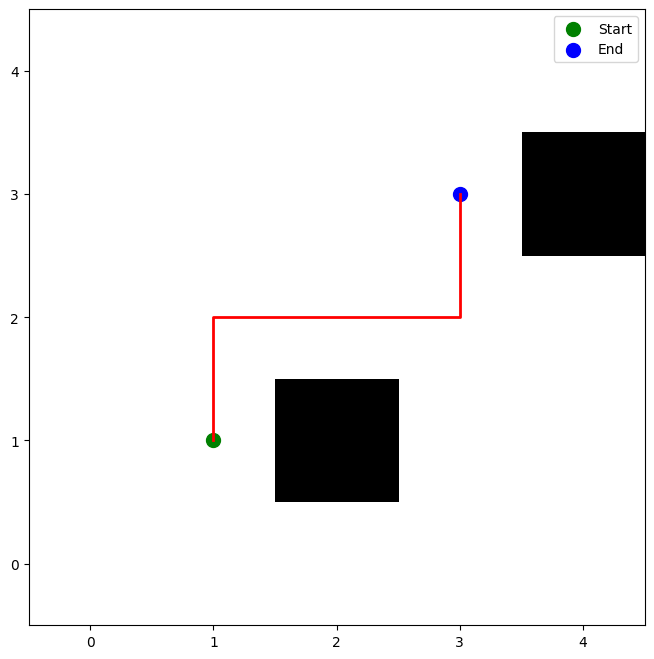

Exiting the program.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import heapq

def get_user_input():
    rows = int(input("Enter number of rows: "))
    cols = int(input("Enter number of columns: "))
    grid = np.zeros((rows, cols), dtype=int)

    num_obstacles = int(input("Enter number of obstacles: "))
    for i in range(num_obstacles):
        obs_row = int(input(f"Enter obstacle {i+1} row: "))
        obs_col = int(input(f"Enter obstacle {i+1} column: "))
        grid[obs_row, obs_col] = 1  # Mark obstacle positions as 1

    start_row = int(input("Enter starting point row: "))
    start_col = int(input("Enter starting point column: "))
    start = (start_row, start_col)

    end_row = int(input("Enter destination point row: "))
    end_col = int(input("Enter destination point column: "))
    end = (end_row, end_col)

    return grid, start, end

def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(node, grid):
    rows, cols = grid.shape
    x, y = node
    neighbors = []

    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Four directions (up, down, left, right)
        nx, ny = x + dx, y + dy
        if 0 <= nx < rows and 0 <= ny < cols:
            if grid[nx, ny] == 0:
                neighbors.append((nx, ny))
    return neighbors

def a_star_algorithm(grid, start, end):
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, end), 0, start))  # (f_score, g_score, node)
    came_from = {}  # To reconstruct the path
    g_score = {start: 0}

    closed_set = set()

    while open_set:
        current_f, current_g, current = heapq.heappop(open_set)

        if current == end:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        closed_set.add(current)

        for neighbor in get_neighbors(current, grid):
            if neighbor in closed_set:
                continue

            tentative_g_score = g_score[current] + 1  # Cost from start to neighbor

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic(neighbor, end)
                heapq.heappush(open_set, (f_score, tentative_g_score, neighbor))

    return None  # No path found

def visualize_grid(grid, path, start, end):
    plt.figure(figsize=(8, 8))
    # Display grid
    display_grid = np.copy(grid)
    # Mark obstacles
    plt.imshow(display_grid, cmap='Greys')

    # Plot the path
    if path:
        path_rows, path_cols = zip(*path)
        plt.plot(path_cols, path_rows, color='red', linewidth=2)  # Path
    # Mark start and end
    plt.scatter(start[1], start[0], c='green', s=100, label='Start')  # Start
    plt.scatter(end[1], end[0], c='blue', s=100, label='End')        # End

    plt.legend()
    plt.gca().invert_yaxis()  # Invert y-axis to match grid indexing
    plt.show()

def main():
    while True:
        grid, start, end = get_user_input()
        df = pd.DataFrame(grid)
        print("\nGrid before pathfinding:")
        print(df)

        path = a_star_algorithm(grid, start, end)

        if path:
            print("\nPath found:")
            print(path)
            visualize_grid(grid, path, start, end)
        else:
            print("No valid path found.")
            visualize_grid(grid, [], start, end)

        retry = input("Do you want to retry? (y/n): ").lower()
        if retry != 'y':
            print("Exiting the program.")
            break

if __name__ == "__main__":
    main()